## DAI-101 Assignment-2 
## Name: Moharir Ameya Nitin
## Enrollment No: 23113099
## Batch: ME-4 (Batch-1)

### Objective: To enhance restaurants' understanding of tipping behavior, helping tailor services and optimize operations develop a predictive model to estimate tip amounts in restaurants based on customer billing and demographic details.
### Selected Dataset: Tips

### First we will preprocess and clean the data, for example, dropping missing values and duplicates, converting (encoding) categorical data to numerical data as we have to use regression techniques (which require numerical data).

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load dataset
df = pd.read_csv('Tips.csv')

In [3]:
df.shape

(244, 7)

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [6]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [7]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


### There are no missing values in the dataset.

In [8]:
duplicates = df.duplicated() 
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 1


In [9]:
# Dropping the duplicate row
df = df.drop_duplicates()

### We will perform encoding to convert categorical columns to numeric.

In [10]:

df_data = df.drop(columns=['tip'])
label_encoder = LabelEncoder()
df_data['sex'] = label_encoder.fit_transform(df['sex'])
df_data['smoker'] = label_encoder.fit_transform(df['smoker'])
df_data['day'] = label_encoder.fit_transform(df['day'])
df_data['time'] = label_encoder.fit_transform(df['time'])

### Before we apply regression techniques, it is important to know whether the data follows a linear trend to know which machine learning model will work the best for our data. For, this we will use various methods like tests and plots between the target variable and the predictors.

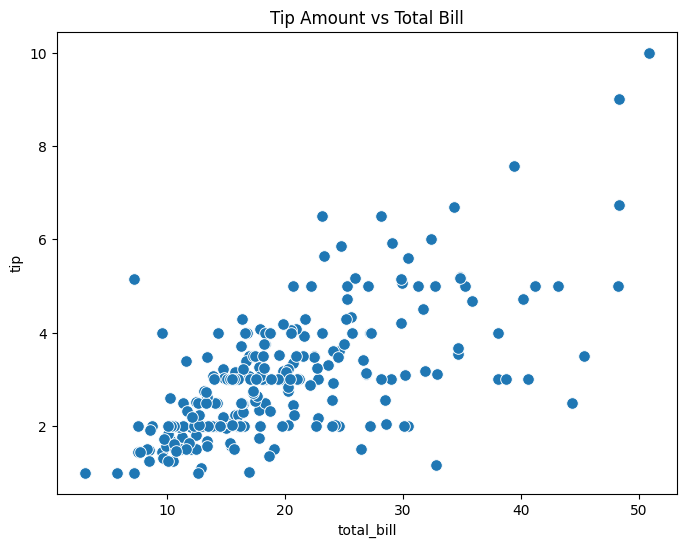

Correlation between total_bill and tip: 0.6749978565456074


In [11]:
# Scatter plot for Tip Amount vs Total Bill
plt.figure(figsize=(8, 6))
sns.scatterplot(x="total_bill", y="tip", data=df,s=70)
plt.title("Tip Amount vs Total Bill")
plt.show()
correlation = df['total_bill'].corr(df['tip'])
print("Correlation between total_bill and tip:", correlation)

### It is clear that there is a moderate positive correlation between Total bill and tip. It means users who have ordered more food, tend to tip more proportionate to their bill.

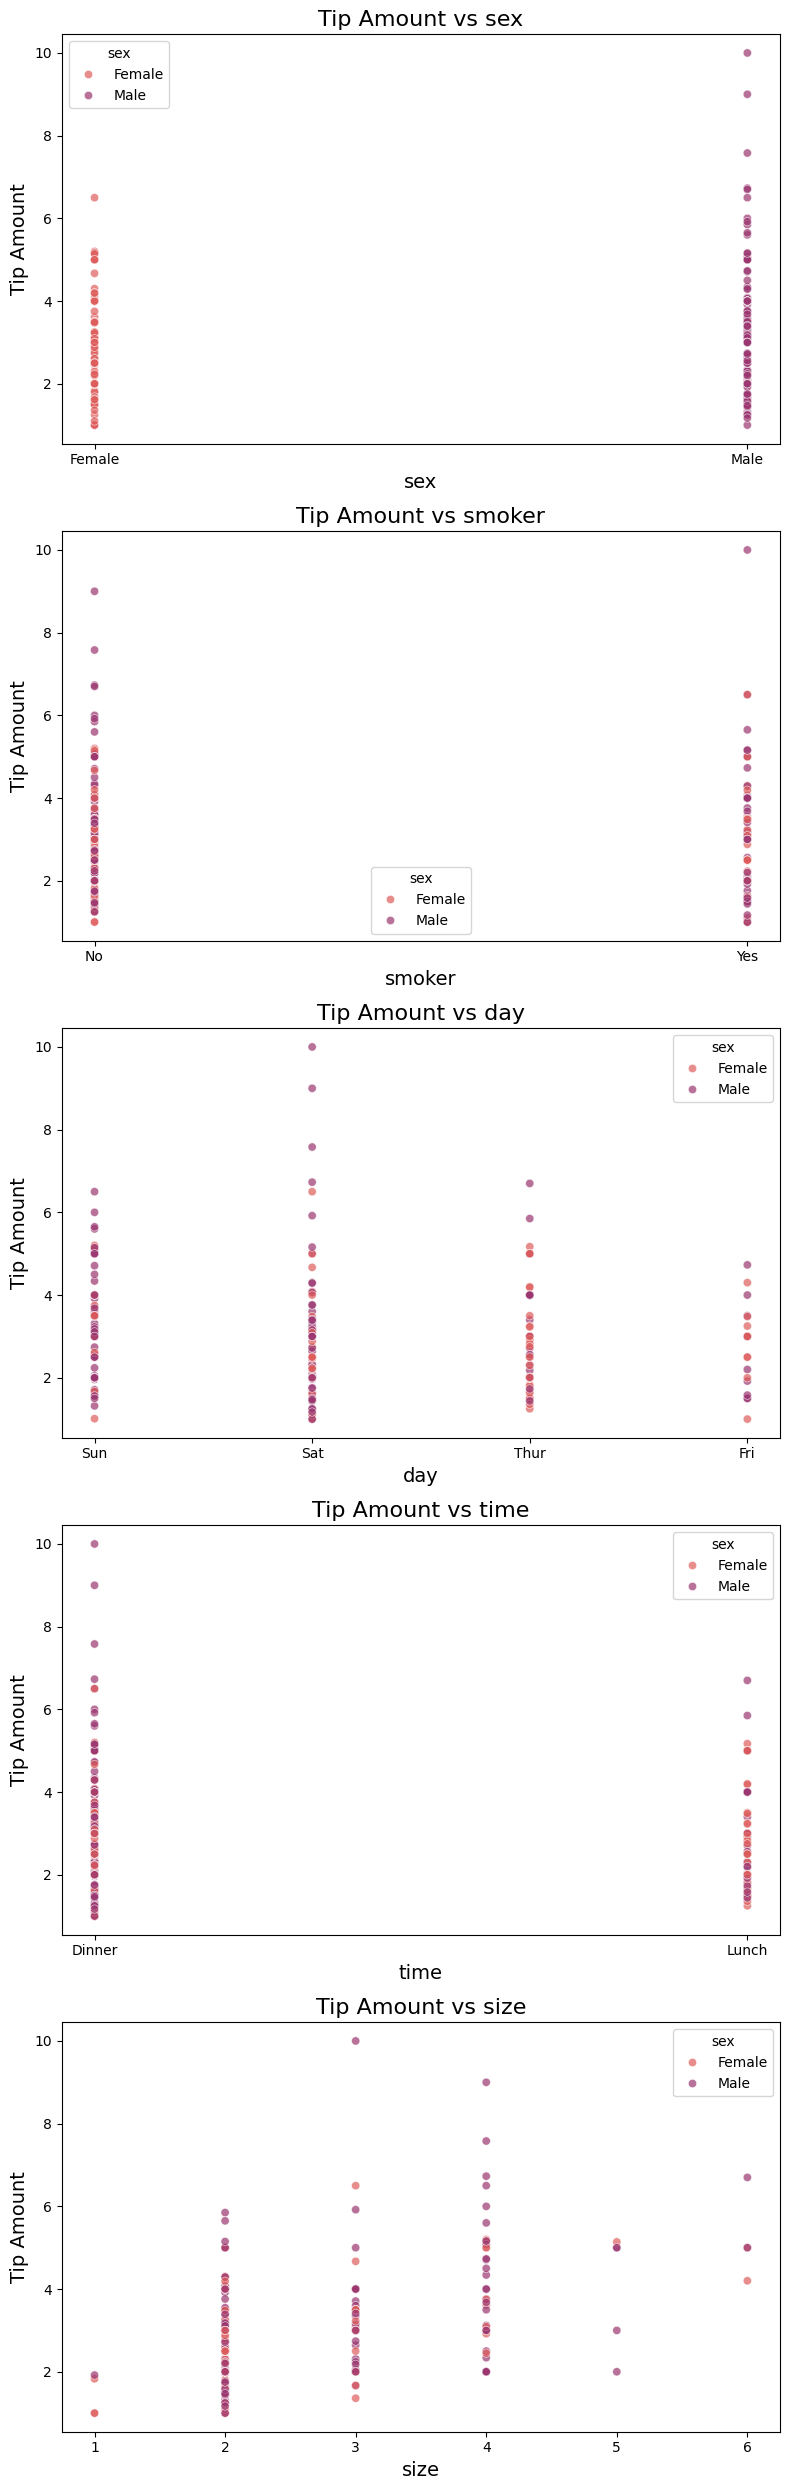

In [12]:
features = df.columns.drop(['tip', 'total_bill'])

sns.set_palette("rainbow")
plt.figure(figsize=(8, len(features) * 5))

# Loop through features excluding 'tip' and 'total_bill'
for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 1, i)
    
    # Use 'rainbow' color palette for gender differentiation
    if 'sex' in df.columns:
        sns.scatterplot(x=feature, y='tip', hue='sex', data=df, palette="flare", alpha=0.7)
    else:
        sns.scatterplot(x=feature, y='tip', data=df, color='blue', alpha=0.7)
    
    plt.title(f'Tip Amount vs {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Tip Amount', fontsize=14)

plt.tight_layout()
plt.show()

### From the above scatterplots, following observations are made:
### 1. Male consumers tend to tip more as compared to the female consumers.
### 2. There is not much differentiation between the tips of smokers and non-smokers, but non-smokers tip slightly more.
### 3. On Saturday and Sunday, higher tips are obtained. This could be due to more number of customers coming to restaurants in their free time (Weekend)
### 4. Customers having dinner give higher tips.
### 5. Larger table size (bigger group size) gives higher tips.

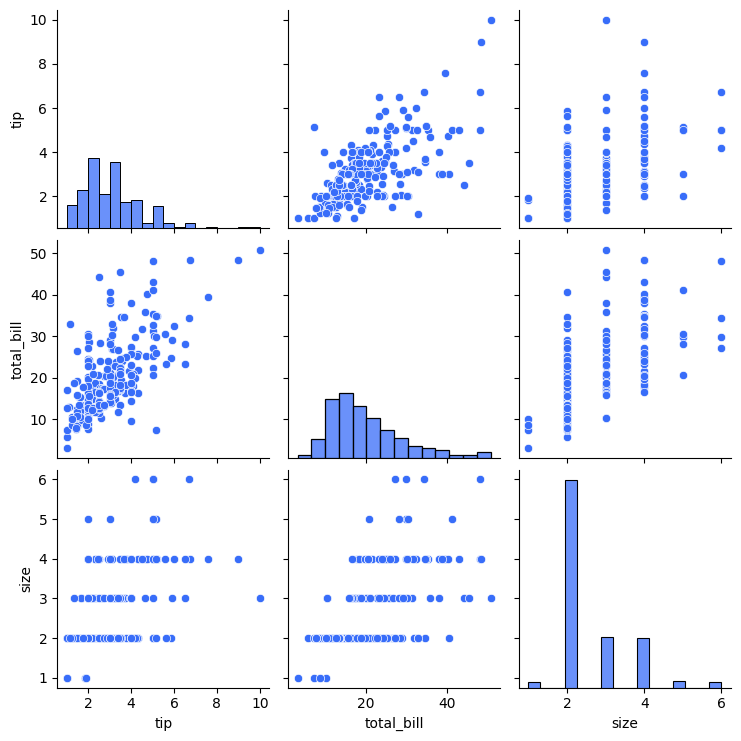

In [13]:
sns.pairplot(df[['tip', 'total_bill', 'size']])
plt.show()

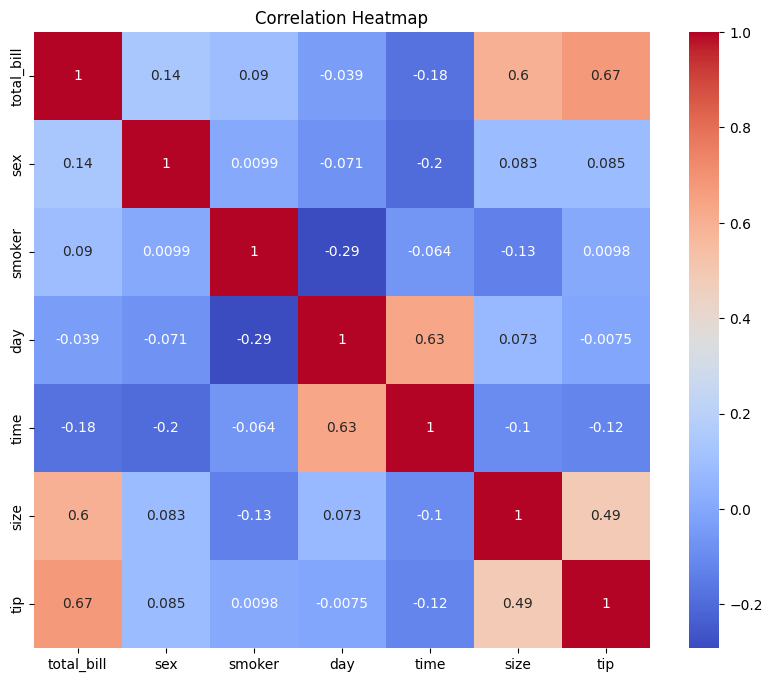

In [14]:
df_temp = df_data.copy()
df_temp['tip'] = df['tip']  # Assuming `tip` is a separate Series or column

plt.figure(figsize=(10, 8))
correlation_matrix = df_temp.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

### We learn more about the relationship between the features and the target variable from the above pairplots and heatmap.

### We will now perform the statistical tests for linearity i.e the Rainbow test for this dataset.

In [15]:
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

X = df_data
X = sm.add_constant(X)
y = df['tip']

model = sm.OLS(y, X).fit()

# Perform the Rainbow Test
rainbow_stat, rainbow_p_value = linear_rainbow(model)

print("Rainbow Test Statistic:", rainbow_stat)
print("Rainbow Test p-value:", rainbow_p_value)

if rainbow_p_value < 0.05:
    print("Significant non-linearity detected (p < 0.05). Consider using a non-linear model.")
else:
    print("No significant non-linearity detected (p >= 0.05). The linearity assumption holds.")


Rainbow Test Statistic: 1.2896906717861412
Rainbow Test p-value: 0.08500916738766763
No significant non-linearity detected (p >= 0.05). The linearity assumption holds.


### Thus linear models will work well with the given dataset.

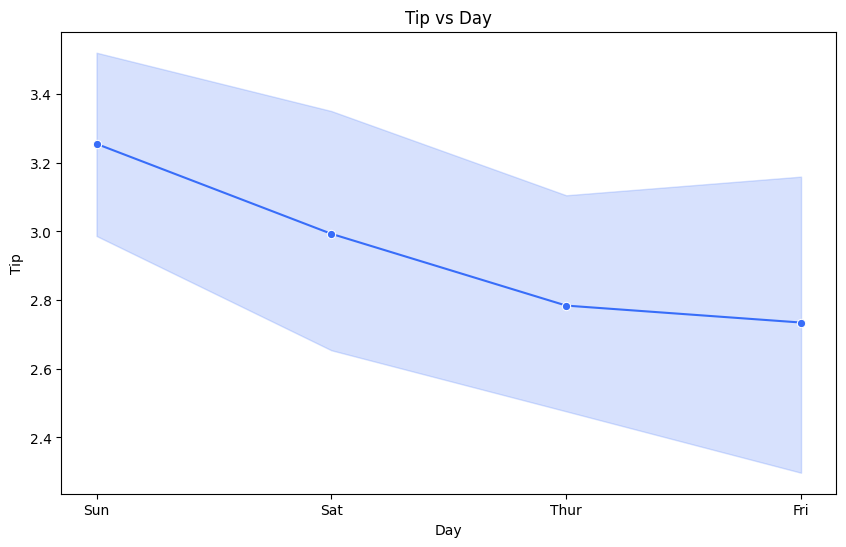

In [16]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='day', y='tip', marker='o')
plt.title('Tip vs Day')
plt.xlabel('Day')
plt.ylabel('Tip')
plt.show()

### We observe once again from the above line plot, that on weekends, higher tips are obtained.

### Now we will use various regression techniques namely, linear regression, ridge and lasso regularization, decision tree regression, ensemble methods (e.g., random forest), train the models and check their respective performance using MSE, R2 and RMSE.

In [17]:
tips_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)
X = tips_encoded.drop(columns='tip')
y = tips_encoded['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **1. Linear Regression**

In [18]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_reg.predict(X_test)

# Evaluation
mse_lr = mean_squared_error(y_test, y_pred_linear)
r2_lr = r2_score(y_test, y_pred_linear)
print("Linear Regression -\nMSE:", mse_lr, "\nR^2:", r2_lr, "\nRMSE:", np.sqrt(mse_lr))


Linear Regression -
MSE: 1.1730028226689762 
R^2: 0.5185656337107039 
RMSE: 1.0830525484338127


## **2. Ridge Regression**


In [19]:
ridge_reg = Ridge(alpha=22)
ridge_reg.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluation
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge Regression -\nMSE:", mse_ridge, "\nR^2:", r2_ridge, "\nRMSE:", np.sqrt(mse_ridge))

Ridge Regression -
MSE: 1.156468555079746 
R^2: 0.5253517764931797 
RMSE: 1.0753922796262516


## **3. Lasso Regression**


In [20]:
lasso_reg = Lasso(alpha=0.03)
lasso_reg.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso_reg.predict(X_test)
# Evaluation
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso Regression -\nMSE:", mse_lasso, "\nR^2:", r2_lasso, "\nRMSE:", np.sqrt(mse_lasso))


Lasso Regression -
MSE: 1.1574536449023305 
R^2: 0.5249474670701255 
RMSE: 1.0758501963109597


## **4. Decision Tree Regression**


In [21]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_reg.predict(X_test)

# Evaluation
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print("Decision Tree -\nMSE:", mse_tree, "\nR^2:", r2_tree, "\nRMSE:", np.sqrt(mse_tree))

Decision Tree -
MSE: 1.324061224489796 
R^2: 0.45656688609660423 
RMSE: 1.1506785930440333


## **5. Ensemble Method (Random Forest Regression)**

In [22]:
forest_reg = RandomForestRegressor(n_estimators=150, random_state=0)
forest_reg.fit(X_train, y_train)

# Predictions
y_pred_forest = forest_reg.predict(X_test)

# Evaluation
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)
print("Random Forest -\nMSE:", mse_forest, "\nR^2:", r2_forest, "\nRMSE:", np.sqrt(mse_forest))


Random Forest -
MSE: 1.2137696718367348 
R^2: 0.5018337368939221 
RMSE: 1.1017121547104465


## **6. Support Vector Regression (SVR)**

In [23]:
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# Evaluate model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("Support Vector Regression -\nMSE:", mse_svr, "\nR^2:", r2_svr, "\nRMSE:", np.sqrt(mse_svr))

Support Vector Regression -
MSE: 1.3903641900083876 
R^2: 0.4293542267826955 
RMSE: 1.1791370531063756


## **7. K-Nearest Neighbors (KNN) Regression**


In [24]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_reg.predict(X_test)

# Evaluation
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print("K-Nearest Neighbors -\nMSE:", mse_knn, "\nR^2:", r2_knn, "\nRMSE:", np.sqrt(mse_knn))


K-Nearest Neighbors -
MSE: 1.6348621224489799 
R^2: 0.3290051867899779 
RMSE: 1.2786172697288973


In [25]:
##For feature selection use Lasso 
feature_importance = pd.Series(lasso_reg.coef_, index=X.columns)
significant_features = feature_importance[feature_importance != 0].sort_values(ascending=False)
print("Significant Factors impacting tips:")
print(significant_features)

Significant Factors impacting tips:
size          0.177450
total_bill    0.087377
dtype: float64


### The most significant feature that affects tips is size as evident from the above feature importance analysis.

### Now we will visualise the models' performance using residual plots.

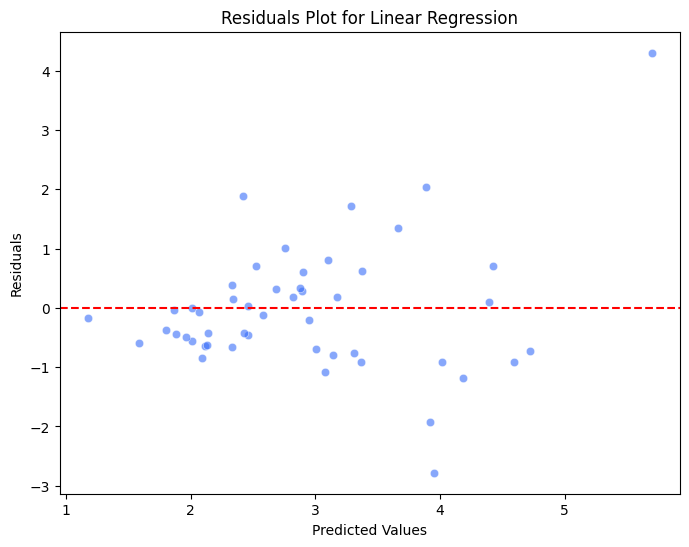

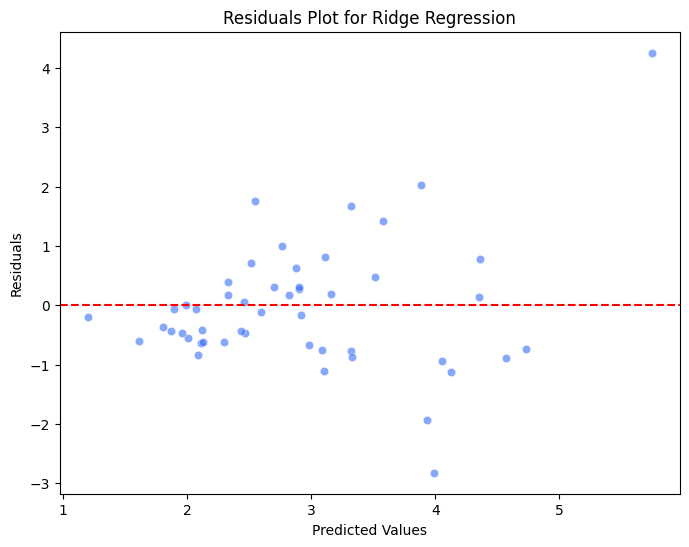

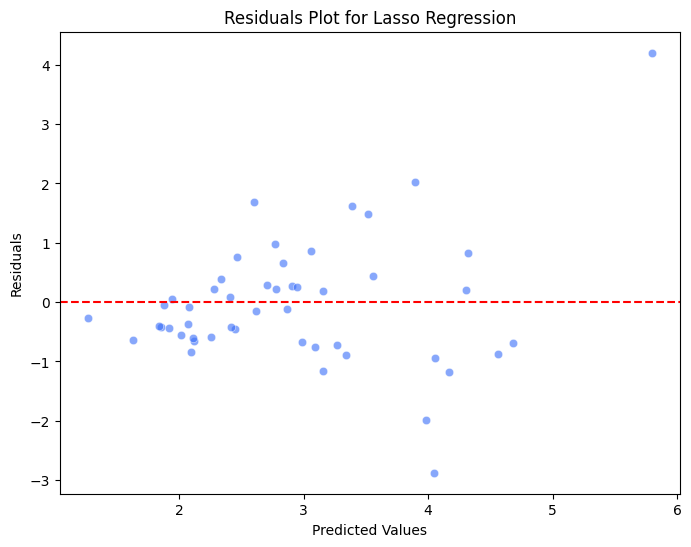

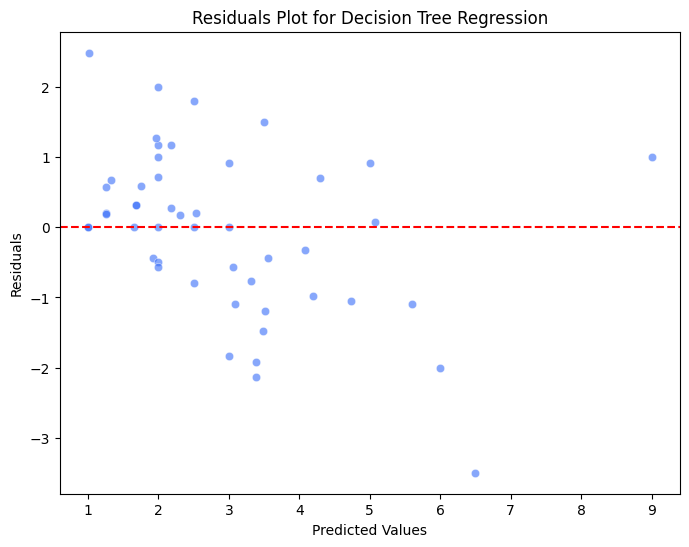

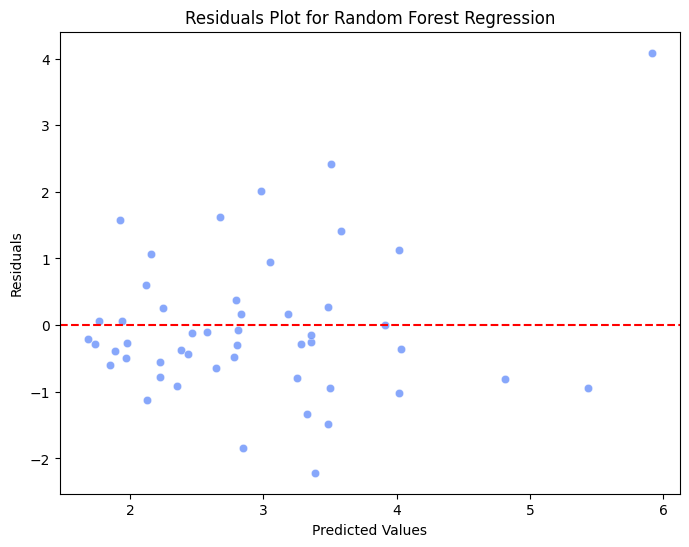

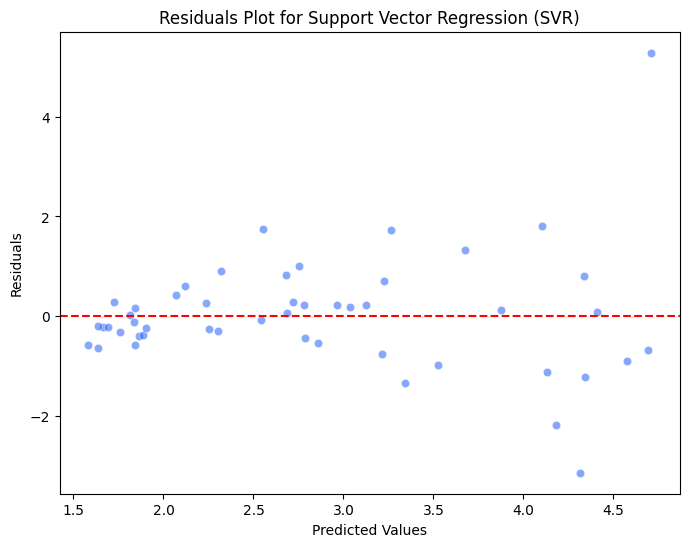

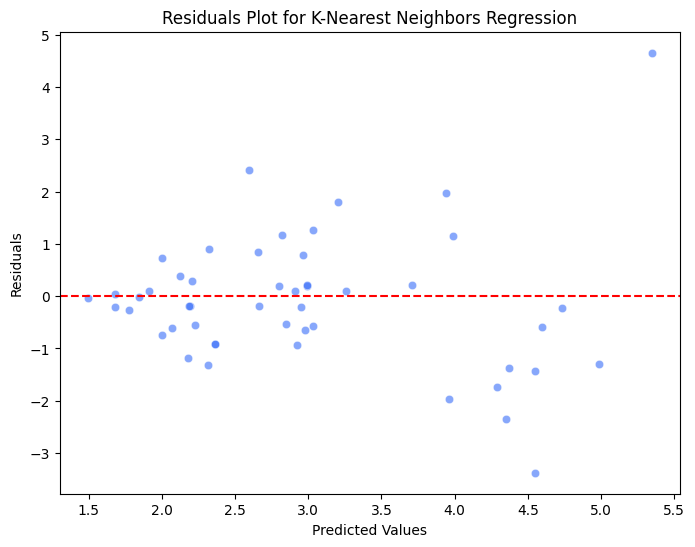

In [26]:
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residuals Plot for {model_name}")
    plt.show()
models = {
    "Linear Regression": linear_reg,
    "Ridge Regression": ridge_reg,
    "Lasso Regression": lasso_reg,
    "Decision Tree Regression": tree_reg,
    "Random Forest Regression": forest_reg,
    "Support Vector Regression (SVR)": svr,
    "K-Nearest Neighbors Regression": knn_reg
}


for model_name, model in models.items():
    y_pred = model.predict(X_test)
    plot_residuals(y_test, y_pred, model_name)


#### As it is clear from the low R2 and residual plot, the KNN regression technique is not a good fit for this dataset.

#### After using all the regression techniques, it appears that the **Lasso Regression** technique is best suited for this dataset, as it has the highest R2 and least MSE.

## *Conclusion and Insights for the Management:*
### 1. From the analysis, it is clear that the higher-tip customer groups should be targeted (e.g Male customers, large groups).
### 2. Allocate skilled staff during high-tip periods (e.g., weekends, dinner time) to maximize service quality and encourage higher tipping.
### 3. Low tips are observed during Lunchtime and on weekdays, so some innovative solutions like discounts can be thought of to improve tips during these periods.
### 4. Train servers to cater effectively to larger groups, which often yield higher tips, and consider group incentives.
### 5. Overall the restaurant should work on the food, service quality and also on the overall ambience to improve customer satisfaction.